O objetivo desse código é criar um modelo de Machine Learning usando a clusterização K-means.
O código está todo comentado para melhor compreensão das etapas.

In [1]:
#Improtando as bibliotecas

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import calendar
from datetime import datetime

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator
from sklearn.cluster import KMeans

sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importando os dois dataframes que serão usados

path1 = (fr"C:\Users\lucal\OneDrive\Documents\Desafio Indicium\northwind\orders.csv")
path2 = (fr"C:\Users\lucal\OneDrive\Documents\Desafio Indicium\northwind\order_details.csv")

df = pd.read_csv(path1, sep = ";")
df_aux = pd.read_csv(path2, sep = ";")

In [3]:
df_aux.dtypes #Verificando os tipos de dados do dataframa df_aux

order_id        int64
product_id      int64
unit_price    float64
quantity        int64
discount      float64
dtype: object

In [4]:
df.dtypes #Verificando os tipos de dados do dataframa df

order_id              int64
customer_id          object
employee_id           int64
order_date           object
required_date        object
shipped_date         object
ship_via              int64
freight             float64
ship_name            object
ship_address         object
ship_city            object
ship_region          object
ship_postal_code     object
ship_country         object
dtype: object

In [5]:
#Transformando o tipo de coluna para datetime

df["order_date"] = pd.to_datetime(df["order_date"])

In [6]:
#Criando a coluna total

df_aux["total"] = (df_aux["unit_price"]*df_aux["quantity"]) * (1 - df_aux["discount"])

pd.options.display.float_format = '{:.2f}'.format

display(df_aux)

,order_id,product_id,unit_price,quantity,discount,total
0,10248,11,14.00,12,0.00,168.00
1,10248,42,9.80,10,0.00,98.00
2,10248,72,34.80,5,0.00,174.00
3,10249,14,18.60,9,0.00,167.40
4,10249,51,42.40,40,0.00,1696.00
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.50
2151,11077,66,17.00,1,0.00,17.00
2152,11077,73,15.00,2,0.01,29.70
2153,11077,75,7.75,4,0.00,31.00


In [7]:
#Agrupando o total por pedido

total_pedido = df_aux.groupby("order_id")["total"].sum()

df_total_pedido = total_pedido.reset_index()

display(df_total_pedido)

,order_id,total
0,10248,440.00
1,10249,1863.40
2,10250,1552.60
3,10251,654.06
4,10252,3597.90
...,...,...
825,11073,300.00
826,11074,232.08
827,11075,498.10
828,11076,792.75


In [8]:
df["total"]= df_total_pedido["total"] #CrPuxando a coluna total para o meu dataframe principal (está na última posição)

In [9]:
display(df)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,total
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,440.00
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany,1863.40
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,1552.60
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France,654.06
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium,3597.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaN,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,NaN,05033,Mexico,300.00
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaN,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,NaN,1734,Denmark,232.08
827,11075,RICSU,8,1998-05-06,1998-06-03,NaN,2,6.19,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland,498.10
828,11076,BONAP,4,1998-05-06,1998-06-03,NaN,2,38.28,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France,792.75


In [10]:
#Calculando a data da última comrpra do cliente

df_recency = (
    df[["order_date","customer_id"]].groupby("customer_id")["order_date"].agg("max").reset_index()
)

In [11]:
display(df_recency)

,customer_id,order_date
0,ALFKI,1998-04-09
1,ANATR,1998-03-04
2,ANTON,1998-01-28
3,AROUT,1998-04-10
4,BERGS,1998-03-04
...,...,...
84,WARTH,1998-04-15
85,WELLI,1998-03-09
86,WHITC,1998-05-01
87,WILMK,1998-04-07


In [12]:
#Para esse estudo, a recência será calculada em meses. A função abaixo irá usar a data mais recente de compra no dataset 
#como a data atual (como referência) e irá subtrair dela a data da última compra de cada cliente e trará a resposta em meses.
#Portanto, a data de referência é a data da última compra de cada cliente.

data_atual = df_recency["order_date"].max() #data da última compra registrada no dataframe

def diferenca_de_meses(data_atual, datetime_val):
    return 12 * (data_atual.year - datetime_val.year) + (data_atual.month-datetime_val.month)

df_recency["recency"] = df_recency["order_date"].apply(lambda datetime_val: diferenca_de_meses(data_atual, datetime_val))

In [13]:
display(df_recency)

,customer_id,order_date,recency
0,ALFKI,1998-04-09,1
1,ANATR,1998-03-04,2
2,ANTON,1998-01-28,4
3,AROUT,1998-04-10,1
4,BERGS,1998-03-04,2
...,...,...,...
84,WARTH,1998-04-15,1
85,WELLI,1998-03-09,2
86,WHITC,1998-05-01,0
87,WILMK,1998-04-07,1


<Axes: xlabel='recency'>

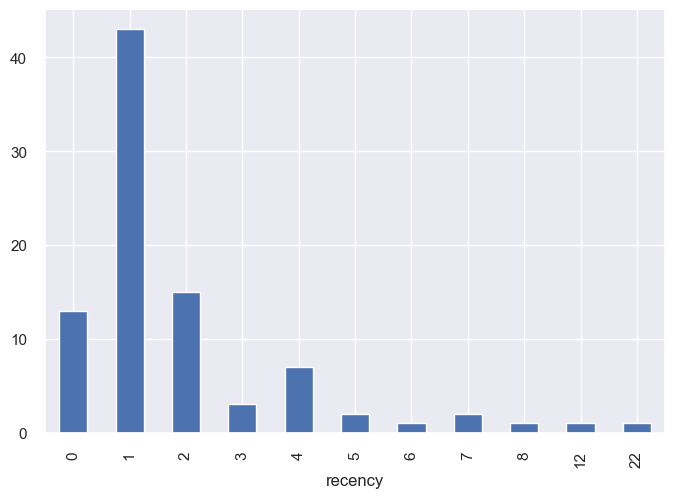

In [14]:
#Distribuição da minha Recência

df_recency["recency"].value_counts().sort_index().plot.bar()

A grande parcela dos clientes compraram entre 0 e 2 meses.

In [15]:
#Excluindo a minha coluna data do dateframe, pois não vou mais usar

df_recency = df_recency.drop("order_date", axis = 1)

In [16]:
#Encontrando a Frequência e o Valor do Ticket Médio por cliente

#Aqui estamos contando o número de pedidos por cliente e achando a média de valor de cada pedido
#Além disso, estamos criando um novo dataframe para armazenar esses dados

df_frequency_value = (df.groupby("customer_id")[["order_id","total"]].agg({"order_id" : "count", "total" : "mean"}).reset_index())

display(df_frequency_value)

,customer_id,order_id,total
0,ALFKI,6,712.17
1,ANATR,4,350.74
2,ANTON,7,1003.43
3,AROUT,13,1030.05
4,BERGS,18,1384.87
...,...,...,...
84,WARTH,15,1043.25
85,WELLI,9,674.24
86,WHITC,14,1954.54
87,WILMK,7,451.62


In [17]:
#Mudando o nome das variáveis

df_frequency_value = df_frequency_value.rename(columns = {"order_id":"frequencia", "total":"media_valor_pedido"})

In [18]:
#Juntando os dados do dataframe recency com o de frequência e valor

df_rfv = df_recency.merge(df_frequency_value, on = "customer_id", how = "left")

display(df_rfv)

,customer_id,recency,frequencia,media_valor_pedido
0,ALFKI,1,6,712.17
1,ANATR,2,4,350.74
2,ANTON,4,7,1003.43
3,AROUT,1,13,1030.05
4,BERGS,2,18,1384.87
...,...,...,...,...
84,WARTH,1,15,1043.25
85,WELLI,2,9,674.24
86,WHITC,0,14,1954.54
87,WILMK,1,7,451.62


In [19]:
#Agora vamos iniciar o nosso estudo de Machine Learning e usaremos o método de clusterização denominado de K-means
#Esse método visa achar semelhanças nos dados e classificá-los em grupos iguais.

#Como frequência e valor possuem escalas numéricas muito distantes, trataremos as colunas usando o StandardScaler
#Ele visa deixar as colunas na mesma escala numérica para que o modelo preditivo funcione.

from sklearn.preprocessing import StandardScaler

colunas_estudo = ["recency", "frequencia", "media_valor_pedido"] #Separa as colunas que eu vou usar para o a minha clusterização

dados_padronizados = df_rfv.copy() #Criando uma cópia do meu dataframe onde vamos colocar as colunas em escala correta

escala = StandardScaler() #Intanciando a Escala

escala.fit(df_rfv[colunas_estudo]) #Treina o algoritmo nos dados originais, calculando a média e o desvio padrão de cada uma das colunas selecionadas
estudo_padronizado = escala.transform(df_rfv[colunas_estudo]) #Aplica as transformações de escala e o estudo_padronizado está como array
dados_padronizados[colunas_estudo] = estudo_padronizado #O dataframe dados_padronizados recebe os valores do array

display(dados_padronizados)

,customer_id,recency,frequencia,media_valor_pedido
0,ALFKI,-0.36,-0.58,-0.57
1,ANATR,-0.02,-0.92,-1.04
2,ANTON,0.68,-0.40,-0.20
3,AROUT,-0.36,0.64,-0.17
4,BERGS,-0.02,1.50,0.29
...,...,...,...,...
84,WARTH,-0.36,0.98,-0.15
85,WELLI,-0.02,-0.06,-0.62
86,WHITC,-0.71,0.81,1.02
87,WILMK,-0.36,-0.40,-0.91


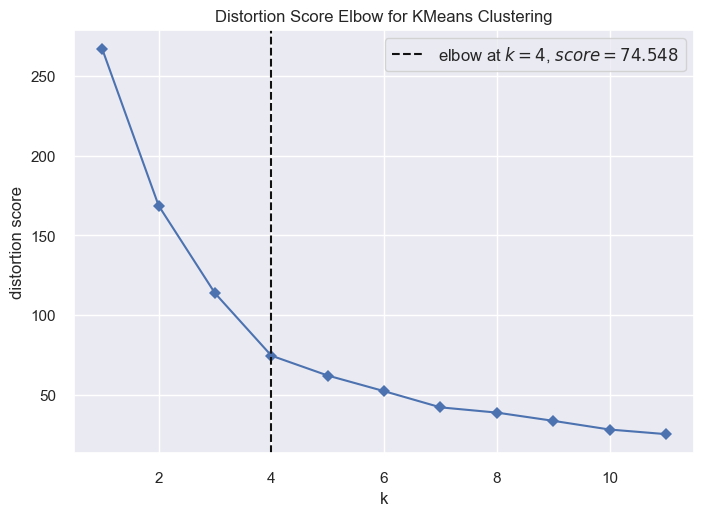

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Usando o modelo Elbow-Model para identificar o melhor número de clusters, ou seja, o que tem o menor erro quadrático.

modelo = KMeans(random_state=42)
visualizer = KElbowVisualizer(modelo, k=(1,12), timings=False)
visualizer.fit(estudo_padronizado)        
visualizer.show()                  


In [21]:
#Determinando o melhor número de clusters

knee = KneeLocator(
    visualizer.k_values_, visualizer.k_scores_, curve='convex', direction='decreasing'
)
otimo_numero_clusters = knee.knee #O numero encontrado foi 4

In [22]:
#Partindo para a etapa da clusterização em si.
#Vamos dividir em quatros clusters. 

from sklearn.cluster import KMeans

#Inicializando o método K-means
kmeans = KMeans(n_clusters=otimo_numero_clusters, random_state=42) #Importando a biblioteca K-Means que já contem todo o algoritmo pronto para clusterização
kmeans.fit(dados_padronizados[colunas_estudo])

#Atribui rótulos a indivíduos
df_rfv["cluster"] = kmeans.labels_ #Aqui será criado uma nova coluna no dataframe indicando o cluster de cada cliente

display(df_rfv)

,customer_id,recency,frequencia,media_valor_pedido,cluster
0,ALFKI,1,6,712.17,1
1,ANATR,2,4,350.74,1
2,ANTON,4,7,1003.43,1
3,AROUT,1,13,1030.05,0
4,BERGS,2,18,1384.87,0
...,...,...,...,...,...
84,WARTH,1,15,1043.25,0
85,WELLI,2,9,674.24,1
86,WHITC,0,14,1954.54,0
87,WILMK,1,7,451.62,1


<Axes: xlabel='cluster', ylabel='recency'>

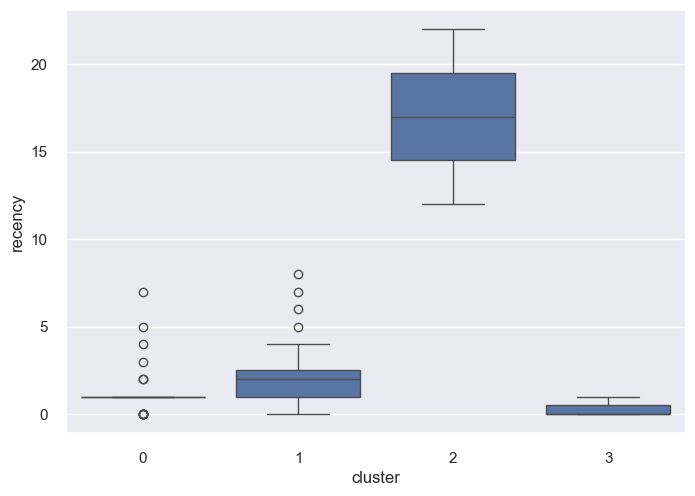

In [23]:
#Entendendo os clusters

#Recência
sns.boxplot(x="cluster", y="recency", data=df_rfv)

<Axes: xlabel='cluster', ylabel='frequencia'>

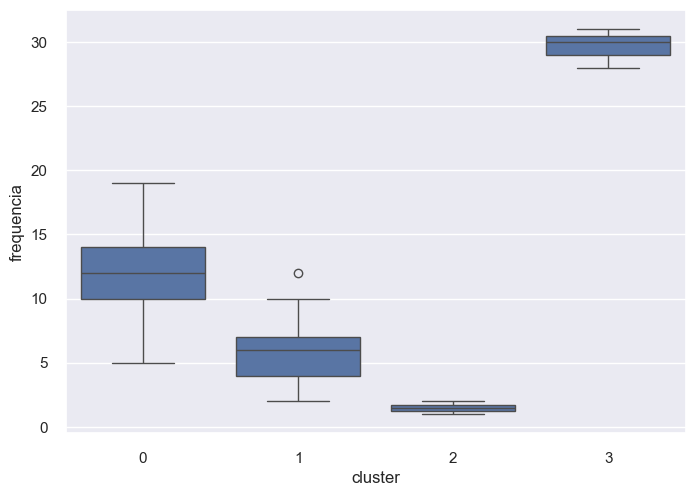

In [24]:
#Frequência

sns.boxplot(x="cluster", y="frequencia", data=df_rfv)

<Axes: xlabel='cluster', ylabel='media_valor_pedido'>

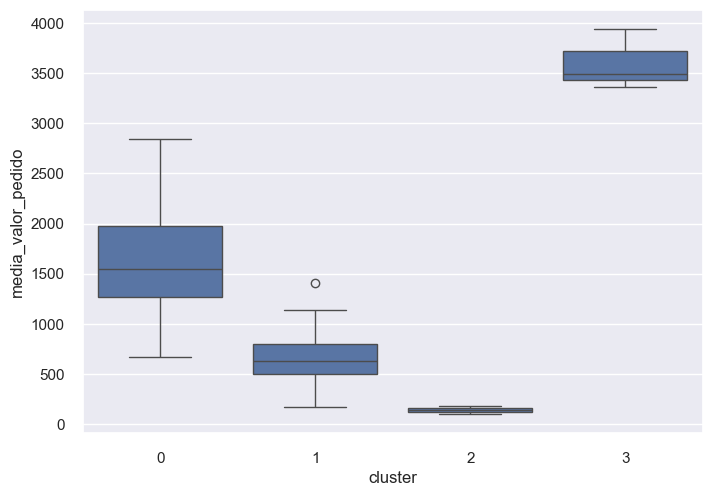

In [25]:
#Ticket Médio por Pedido

sns.boxplot(x="cluster", y="media_valor_pedido", data=df_rfv)

In [26]:
#Analisando as métricas gerais do cluster e criando o dataframe kmeans_metricas

kmeans_metricas = (df_rfv.groupby("cluster")[["customer_id","recency","frequencia","media_valor_pedido"]].agg({
    "customer_id":"nunique",
    "recency":"mean",
    "frequencia":"mean",
    "media_valor_pedido":"mean"
})
.reset_index()
)

#Renomeando colunas
kmeans_metricas = kmeans_metricas.rename(columns={"customer_id":"numero_clientes"})

#Ordenando por recência
kmeans_metricas = kmeans_metricas.sort_values(by="recency", ascending=True)


In [27]:
display(kmeans_metricas)

,cluster,numero_clientes,recency,frequencia,media_valor_pedido
3,3,3,0.33,29.67,3600.27
0,0,37,1.22,12.38,1655.63
1,1,47,2.17,5.96,655.91
2,2,2,17.00,1.50,139.65


In [28]:
#Nomeação dos clusters para serem mais intuitivos do que apenas cluster 0, 1, 2 e 3

#Teremos os seguintes clusters:

# 0 -> Clientes Muito Bons -> Clientes que compram com muita frequência e que possuem um ticket médio alto.
# 1 -> Clientes Bons -> Clientes que compram com uma certa frequência e que possuem um ticket médio razoável.
# 2 -> Possível Churn -> Clientes que compraram 1 ou 2 vezes e a muito tempo atrás.
# 3 -> Clientes Premium -> clientes que compram com altíssima frequência e que possui um ticket médio muito alto.

kmeans_metricas["segmento"] = ["Clientes Premium", "Clientes Muito Bons", "Clientes Bons", "Possivel Churn"]
display(kmeans_metricas)


,cluster,numero_clientes,recency,frequencia,media_valor_pedido,segmento
3,3,3,0.33,29.67,3600.27,Clientes Premium
0,0,37,1.22,12.38,1655.63,Clientes Muito Bons
1,1,47,2.17,5.96,655.91,Clientes Bons
2,2,2,17.00,1.50,139.65,Possivel Churn


In [29]:
# Adicionando a segmentacao ao cluster associado no nosso dataframe
segmentacao = {
    3: "Clientes Premium",
    0: "Clientes Muito Bons",
    1: "Clientes Bons",
    2: "Possivel Churn"
}
df_rfv["segmento"] = df_rfv["cluster"].map(segmentacao)

#Exportando esse novo dataframe em arquivo .csv
df_rfv.to_csv("clientes_segmentados.csv", index=False)

Por meio desse código foi possível classificar  os tipos de clientes que temos na nossa base de dados e, assim, identificar os possíveis clientes que vão sofrer churn.